In [1]:
!pip install tensorflow==1.14

In [2]:
!pip show tensorflow

Name: tensorflow
Version: 1.14.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\h0920\.conda\envs\tf1env\lib\site-packages
Requires: numpy, keras-applications, tensorflow-estimator, tensorboard, wrapt, absl-py, google-pasta, astor, grpcio, keras-preprocessing, protobuf, termcolor, six, wheel, gast
Required-by: 


In [3]:
!pip install tflearn

In [36]:
!pip list

Package              Version
-------------------- ---------
absl-py              0.15.0
argon2-cffi          20.1.0
astor                0.8.1
async-generator      1.10
attrs                21.4.0
backcall             0.2.0
bleach               4.1.0
certifi              2021.5.30
cffi                 1.14.6
colorama             0.4.4
coverage             5.5
cycler               0.11.0
Cython               0.29.24
dataclasses          0.8
decorator            5.1.1
defusedxml           0.7.1
entrypoints          0.3
gast                 0.2.2
google-pasta         0.2.0
grpcio               1.36.1
h5py                 2.10.0
importlib-metadata   4.8.1
ipykernel            5.3.4
ipython              7.16.1
ipython-genutils     0.2.0
ipywidgets           7.6.5
jedi                 0.17.2
Jinja2               3.0.3
jsonschema           3.2.0
jupyter              1.0.0
jupyter-client       7.1.2
jupyter-console      6.4.3
jupyter-core         4.8.1
jupyterlab-pygments  0.1.2
jupyterlab-wid

In [5]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# 避免 Jupyter 出錯才用這行，Python 腳本中請移除
# %matplotlib inline

# 設定參數
TRAIN_DIR = 'D:/金融科技/HW/說明檔案/12.Dogs vs. Cats-2/train'
TEST_DIR = 'D:/金融科技/HW/說明檔案/12.Dogs vs. Cats-2/test'
IMG_SIZE = 50
LR = 1e-3             # learning rate
MODEL_NAME = 'dogs-vs-cats-convnet'

In [6]:
# 建立標籤：[1, 0] 為貓， [0, 1] 為狗
def label_img(img):
    word_label = img.split('.')[-3]
    return [1, 0] if word_label == 'cat' else [0, 1]

In [7]:
# 建立訓練資料集
def create_train_data():
    training_data = []

    for img in tqdm(os.listdir(TRAIN_DIR)):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)

        try:
            # 嘗試用 OpenCV 讀取灰階圖片
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            # 若 OpenCV 讀取失敗，嘗試用 PIL
            if img_data is None:
                with Image.open(path) as pil_img:
                    pil_img = pil_img.convert('L')  # 轉為灰階
                    img_data = np.array(pil_img)

            # 確保圖片已成功轉換
            if img_data is None:
                print(f"⚠️ 無法讀取圖片：{path}，已跳過")
                continue

            img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
            training_data.append([np.array(img_data), np.array(label)])

        except Exception as e:
            print(f"⚠️ 無法讀取圖片：{path}，錯誤：{e}")
            continue

    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

# 執行建立訓練資料
train_data = create_train_data()

100%|███████████████████████████████████████████████████████████████████████████| 11941/11941 [01:51<00:00, 107.04it/s]


In [8]:
from PIL import Image

def create_test_data():
    testing_data = []

    for img in tqdm(os.listdir(TEST_DIR)):
        path = os.path.join(TEST_DIR, img)
        img_num = img.split('.')[0]

        try:
            # 優先嘗試使用 OpenCV 讀取灰階圖
            img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

            # 如果 OpenCV 失敗，使用 PIL 讀取
            if img_data is None:
                with Image.open(path) as pil_img:
                    pil_img = pil_img.convert('L')  # 轉成灰階
                    img_data = np.array(pil_img)

            # 檢查是否仍失敗
            if img_data is None:
                print(f"⚠️ 無法讀取圖片：{path}，已跳過")
                continue

            img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
            testing_data.append([np.array(img_data), img_num])

        except Exception as e:
            print(f"⚠️ 無法處理圖片：{path}，錯誤：{e}")
            continue

    shuffle(testing_data)
    np.save('test_data.npy', testing_data)
    return testing_data

# 建立測試資料
test_data = create_test_data()

100%|██████████████████████████████████████████████████████████████████████████████| 6000/6000 [01:21<00:00, 73.81it/s]


In [ ]:
# if you already have train data:
#train_data=np.load('train_data.npy')
# test_data=np.load('test_data.npy')

In [28]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

#tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')
model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)

ImportError: Traceback (most recent call last):
  File "C:\Users\H0920\.conda\envs\tf1env\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\H0920\.conda\envs\tf1env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\H0920\.conda\envs\tf1env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\H0920\.conda\envs\tf1env\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\H0920\.conda\envs\tf1env\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 動態連結程式庫 (DLL) 初始化例行程序失敗。


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [37]:
# ImportError: DLL load failed: 動態連結程式庫 (DLL) 初始化例行程序失敗。
# https://github.com/tensorflow/tensorflow/issues/22512

In [29]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [30]:
train=train_data[:-600]
test=train_data[-600:]

In [31]:
X=np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y=[i[1] for i in train]

test_x=np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y=[i[1] for i in test]

In [32]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, 
    validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

NameError: name 'model' is not defined

In [33]:
model.save(MODEL_NAME)

NameError: name 'model' is not defined

In [34]:
d = test_data[0]
img_data, img_num = d

data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")

print('Cat Possibility: {:5.2f}% \nDog Possibility: {:5.2f}%'.format(prediction[0]*100, prediction[1]*100))

NameError: name 'model' is not defined

NameError: name 'model' is not defined

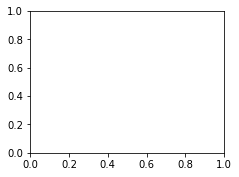

In [35]:
fig=plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[:16]):
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4, 4, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_label='Dog'
    else:
        str_label='Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# Using our Network - Using Convolutional Neural Network to Identify Dogs vs Cats p. 1-4
# https://www.youtube.com/watch?v=gT4F3HGYXf4
# https://www.youtube.com/watch?v=Ge65ukmJTzQ
# https://www.youtube.com/watch?v=ViO56ASqeks&t=907s
# https://www.youtube.com/watch?v=27FPv1VHSsQ

In [ ]:
# https://medium.com/@curiousily/tensorflow-for-hackers-part-iii-convolutional-neural-networks-c077618e590b